# Fracciones continuas

# Librerias usadas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

# Introducción

Una fracción continua es una expresión de la forma: $$\frac{b_{1}}{a_{1}+\frac{b_{2}}{a_{2}+\frac{b_{3}}{b_{3}+\frac{b_{4}}{a_{4}+\frac{\cdots}{\ldots}}}}} $$ que escrita en la notación de Prinsheim quedaría como: $$\frac{b_1 \mid}{\mid a_{1}}+\frac{b_2 \mid}{\mid a_{2}}+\frac{b_3 \mid}{\mid a_{3}}+\frac{b_4 \mid}{\mid a_{4}}+\cdots$$


Las fracciones continuas pueden interpretarse como una sucesión $\{T_n\}_{n\geq 1}$ determinada por:

$\begin{align}
T_1 &= \frac{p_1}{q_1}= \frac{b_1}{a_1} =\frac{b_1 \mid}{\mid a_{1}}\\
T_2 &= \frac{p_2}{q_2}= \frac{b_1}{a_1+\frac{b_2}{a_2}} =\frac{b_1 \mid}{\mid a_{1}}+\frac{b_2 \mid}{\mid a_{2}} \\
T_3 &= \frac{p_3}{q_3}= \frac{b_1}{a_1+\frac{b_2}{a_2+\frac{b_3}{a_3}}}= \frac{b_1 \mid}{\mid a_{1}}+\frac{b_2 \mid}{\mid a_{2}}+\frac{b_3 \mid}{\mid a_{3}}\\
T_4 &= \frac{p_4}{q_4}= \frac{b_1}{a_1+\frac{b_2}{a_2+\frac{b_3}{a_3+\frac{b_4}{a_4}}}}=\frac{b_1 \mid}{\mid a_{1}}+\frac{b_2 \mid}{\mid a_{2}}+\frac{b_3 \mid}{\mid a_{3}}+\frac{b_4 \mid}{\mid a_{4}}\\
& \cdots
\end{align}$

## Fraciones continuas simples

Un caso particular es cuando la sucesión de $b_i$'s es una sucesión constante de valor $1$ y la sucesión de $a_i$'s es una sucesión en números enteros, en este caso la fracción continua se conoce como *fracción contínua simple* y se usa la notación $[a_0;a_1,\cdots]$

$$r = a_0+\frac{1}{a_1+\frac{1}{a_2+\frac{1}{a_3+\frac{1}{a_4+\cdots}}}}=[a_0;a_1,a_2,a_3,a_4,\cdots]$$

Puede probarse que la representación como fracción continua de un número real $r$ es finita si y solo si el número en cuestión es racional, mientras que para el caso en que: $r \in \mathbb{Q}+\sqrt{\mathbb{Q}}$ entonces si bien la representación como fracción contínua es infinita, la sucesión de $a_i$'s presenta un comportamiento periódico permitiendo el uso de la notación $[a_0;a_1,\cdots,a_{n-1},\overline{a_n,\cdots,a_m}]$

## Métodos para calcular fracciones continuas

In [ ]:
from sympy import Add, Pow, Integer, init_printing

In [ ]:
def list_to_frac(l):    
    expr = Integer(0)
    for i in reversed(l[1:]):
        expr = Add(i, expr, evaluate=False)
        expr = Pow(expr, -1, evaluate=False)    
    init_printing(order='old')    
    return Add(l[0], expr, evaluate=False)

def quadratic_to_c_frac(p, q, d=0):
    from sympy.core.compatibility import as_int
    from sympy.functions import sqrt

    p, q, d = list(map(as_int, [p, q, d]))
    sd = sqrt(d)

    if (d - p**2)%q:
        d *= q**2
        sd *= q
        p *= abs(q)
        q *= abs(q)

    terms = []
    pq = {}

    while (p, q) not in pq:
        pq[(p, q)] = len(terms)
        terms.append(int((p + sd)/q))
        p = terms[-1]*q - p
        q = (d - p**2)/q

    i = pq[(p, q)]
    return terms[:i] + [terms[i:]]

def continued_fraction_convergents(cf):

    p_2, q_2 = Integer(0), Integer(1)
    p_1, q_1 = Integer(1), Integer(0)
    for a in cf:
        p, q = a*p_1 + p_2, a*q_1 + q_2
        p_2, q_2 = p_1, q_1
        p_1, q_1 = p, q
        yield p/q

def c_fraction_to_quadratic(cf):

    from sympy.core.symbol import Dummy
    from sympy.solvers import solve

    period = []
    x = Dummy('x')

    def untillist(cf):
        for nxt in cf:
            if isinstance(nxt, list):
                period.extend(nxt)
                yield x
                break
            yield nxt

    a = Integer(0)
    for a in continued_fraction_convergents(untillist(cf)):
        pass

    if period:
        y = Dummy('y')
        solns = solve(continued_fraction_reduce(period + [y]) - y, y)
        solns.sort()
        pure = solns[-1]
        return a.subs(x, pure).radsimp()
    else:
        return a

def continued_fraction_reduce(cf):

    from sympy.core.symbol import Dummy
    from sympy.solvers import solve

    period = []
    x = Dummy('x')

    def untillist(cf):
        for nxt in cf:
            if isinstance(nxt, list):
                period.extend(nxt)
                yield x
                break
            yield nxt

    a = Integer(0)
    for a in continued_fraction_convergents(untillist(cf)):
        pass

    if period:
        y = Dummy('y')
        solns = solve(continued_fraction_reduce(period + [y]) - y, y)
        solns.sort()
        pure = solns[-1]
        return a.subs(x, pure).radsimp()
    else:
        return a

def rat_to_c_fraction(a,b):    
  coefs = []  
  while b !=0:
    q = a//b
    r = a%b
    coefs.append(q)
    a = b
    b = r
  return coefs

def float_to_c_fraction(x):
  s = str(x).split(".")
  lenstr = len(s[1])
  a, b = int(str(x).replace(".","")), 10**lenstr
  return rat_to_c_fraction(a,b)

def pure_quadratic_period(d):   
  l = quadratic_to_c_frac(0, 1, d)
  period = l[-1]
  p = len(period)
  if p%2 == 0:
    new_l = l[:-1]  
    for i in period:
      new_l.append(i)
  else:
    new_l = l[:-1]  
    for i in period*2:
      new_l.append(i)
  return new_l, p

**Ejemplo 1:** Nuestro primer ejemplo nos ayudará a ver cómo podemos usar las funcionalidades atrás implementadas para tratar con problemas de fracciones continuas simples, usaremos la función <code>list_to_frac</code> para encontrar la fracción contínua simple de un número a partir de la sucesión de $a_i$'s

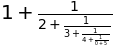

In [ ]:
list_to_frac([1,2,3,4,5])

In [ ]:
list_to_frac([1,2,3,4,5]).doit()

In [ ]:
list_to_frac([1,2,3,4,5]).evalf()

**Ejemplo 2:** Acá veremos cómo usar la función <code>quadratic_to_c_frac</code> para encontrar la fracción contínua simple de un número de la forma $\mathbb{Q}+\sqrt{\mathbb{Q}}$, si el número es racional entonces la fracción continua será finita, mientras que en el caso en que no sea racional, la fracción continua será infinita pero periodica, en Python usaremos la notación de $[a_0,a_1,\cdots,a_{n-1},[a_n,\cdots,a_m]]$

El ejemplo clásico es el de la fracción continua simple del número aúreo $\phi = \frac{1+\sqrt{5}}{2}=[0;1,1,1,\cdots]=[0;\overline{1}]$

In [ ]:
quadratic_to_c_frac(1, 2, 5)

**Ejemplo 3:** En el siguiente ejemplo encontraremos la descomposición en fracción continua simple de $\frac{3+\sqrt{7}}{5}$, obteniendo como resultado:

In [ ]:
quadratic_to_c_frac(3, 5, 7)

Con lo cual hemos verificado que $\frac{1+\sqrt{7}}{5}=[1;7,1,2,1,8,13,8,1,2,1,8,13,8,\cdots]=[1;7,\overline{1,2,1,8,13,8}]$

**Ejemplo 4:** La función <code>continued_fraction_convergents</code> nos da un iterable con la lista de todas las reductas, o convergentes de una fracción continua simple:

In [ ]:
list(continued_fraction_convergents([1,2,3,4,5,6]))

**Ejemplo 5:** Mientras que la función <code>c_fraction_to_quadratic</code> convierte una fracción contínua (finita o infinita periodica) a un número de la forma $\mathbb{Q}+\sqrt{\mathbb{Q}}$

In [ ]:
c_fraction_to_quadratic([1, 4, 2, [3, 1]])

In [ ]:
c_fraction_to_quadratic([1, 4, 2,3,4,5])

**Ejemplo 6:** Finalmente, tenemos los métodos que nos permite pasar de un racional a un fracción contínua simple, puede probarse que la representación como fracción continua simple de un número real es única, con lo cual, tenemos otra forma de representar nuestros números de interés distinta a su representación por ejemplo, en base $10$.

El método <code>rat_to_c_fraction</code> nos permite convertir un racional de la forma $\frac{a}{b}$ a su representación como fracción continua, mientras que <code>float_to_c_fraction</code> nos permite convertir un número flotante de Python a su fracción contínua.

In [ ]:
rat_to_c_fraction(187,13)

In [ ]:
float_to_c_fraction(3.141592653589793238462643383279)

## Ecuación de Pell

La ecuación de Pell es la ecuación de la forma $x^2-Dy^2=1$ con $D \in \mathbb{N}$ un número con raíz cuadrada irracional.

Se busca encontrar $x, y \in \mathbb{Z}$ que cumplan con la ecuación anterior, y para ello se usa la descomposición como fracción contínua de $\sqrt{D}$. Dado que $\sqrt{D}$ es irracional cuadrático, su representación como fracción contínua es infinita pero periódica, digamos de periodo $m$, entonces puede probarse que una solución fundamental de la ecuación de Pell (es fundamental en el sentido de que cualquier otra solución se puede generar a partir de ella) está dada por $x=p_{m-1}, y = q_{m-1}$, donde $\frac{p_{m-1}}{q_{m-1}}$ es la $m-1$ reducta o convergente de la fracción contínua de $\sqrt{D}$ en el caso en que $m$ sea par, o $x=p_{2m-1}, y = q_{2m-1}$, donde $\frac{p_{2m-1}}{q_{2m-1}}$ es la $2m-1$ reducta o convergente de la fracción contínua de $\sqrt{D}$ en el caso en que $m$ sea impar.

**Ejemplo 7:** Con la función <code>quadratic_to_c_frac</code> ya podíamos encontrar la representación como fracción continua de un número de la forma $\mathbb{Q}+\sqrt{\mathbb{Q}}$, en particular, podemos encontrar la representación de $\sqrt{D}$ simplemente haciendo los parámetros de la función, $0$ y $1$ respectivamente.

Hallaremos la representación como fracción contínua de $\sqrt{7}=\frac{0+\sqrt{7}}{1}$

In [ ]:
quadratic_to_c_frac(0, 1, 7)

**Ejemplo 8:** Para resolver la ecuación de Pell, vimos que nos interesa calcular el periodo de la representación como fracción contínua, en el caso de $\sqrt{7}$ vemos que el periodo es $4$, justo como nos lo dice la función <code>pure_quadratic_period</code>, cuya última componente nos da cuenta del periodo, mientras que la primera componente nos retorna la lista de la sucesión de $a_i$'s con solo un periodo si $m$ es par, o con dos periodos si $m$ es impar.

In [ ]:
quadratic_to_c_frac(0, 1, 7)

In [ ]:
pure_quadratic_period(7)

In [ ]:
quadratic_to_c_frac(0, 1, 10)

In [ ]:
pure_quadratic_period(10)

Finalmente, definimos el método para solucionar la ecuación de Pell con base en lo discutido anteriormente:

In [ ]:
def solve_pell_eq(D):
  """
  Resolvemos la ecuación x^2-Dy^2 =1, con D un entero positivo
  """
  #considerar casos
  l = pure_quadratic_period(D)
  a, b = l[0], l[1]
  if b%2 == 0:
    x = (list(continued_fraction_convergents(a))[b-1]).numerator()
    y = (list(continued_fraction_convergents(a))[b-1]).denominator()
    
  else:
    x = (list(continued_fraction_convergents(a))[2*b-1]).numerator()
    y = (list(continued_fraction_convergents(a))[2*b-1]).denominator()

  return x, y

**Ejemplo 9:** Resolveremos la ecuación de Pell: $x^2-7y^2=1$

In [ ]:
solve_pell_eq(7)

Podemos verificar que: $8^2-7\cdot3^2=1$

In [ ]:
solve_pell_eq(11)

In [ ]:
solve_pell_eq(13)

In [ ]:
#Verificamos que la solución de la ecuación de Pell es correcta
649**2-13*180**2

## Método de Herón

El método de Herón es un caso particular del método de Newton para encontrar raíces de polinomios. La idea para encontrar $\sqrt{x}$ es empeza con una aproximación inicial $a_0$ y construir recursivamente las sucesiones de $a_i$'s y $b_i$'s como sigue: $b_{i}=\frac{x}{a_{i}}, \quad a_{i}+1=\frac{a_{i}+b_{i}}{2}$. Puede probarse que ambas sucesiones convergen a $\sqrt{x}$ siempre que $a_0 \neq 0$.

Implementaremos las funciones <code>numeric_heron</code> y <code>symbolic_heron</code>, que no son más sino que el algoritmo de Herón implementado en Python. En el primer caso, operamos numéricamente para construir ambas sucesiones, mientras que en el segundo operamos simbólicamente, trabajando con las fracciones que salgan en el camino, simplificándolas, pero sin hacer la división.

In [ ]:
def numeric_heron(num, guess, tolerance):
    if guess**2 != num:
        
        if abs(float(num) - float(guess)**2) > float(tolerance):
            avg_guess = 0.5 * (float(guess) + (float(num) / float(guess)))
            return heron(num, avg_guess, tolerance)
        print("Dada la toleracia ingresada, el resultado del algoritmo es:", guess)
    else:
        print(guess, "Su aproximación es de hecho, la solución!")

def symbolic_heron(x, a_0, n):
  """
  a0^2 > x, devuelve la sucesión de los n primeros a's
  """
  a = [Integer(a_0)]
  b = [Integer(x)/Integer(a_0)]

  for i in range(n-1):
      a.append(Add(a[i],b[i])/2)
      b.append(x/a[i+1])

  return a

def cyclic_period(d, m):
  q = quadratic_to_c_frac(0, 1, d)
  l = len(q[1])
  new_q = q[:-1]
  for i in q[1]*m:
    new_q.append(i)
  return new_q

**Ejemplo 10:** Hallamos primero la raíz cuadrada de $7$ con los algoritmos internos de Python

In [ ]:
7**0.5

A continuación lo hallaremos con el método numérico de Herón, empezando con el valor de $3$ como su aproximación inicial, hasta que lleguemos a un grado de tolerancia de $0.001$

In [ ]:
numeric_heron(7,3,0.001)

Dada la toleracia ingresada, el resultado del algoritmo es: 2.645833333333333


Finalmente, hallamos la aproximación de la raíz cuadrada de $7$ con el método simbólico de Herón, hallando las fracciones que aproximan dicha raíz. (el algoritmo nos arroja los $5$ primeros términos de la sucesión de $a_i$'s)

In [ ]:
symbolic_heron(7,3,5)

### **Teorema**

Supongamos que $\sqrt{x}$ tiene la siguiente representación como fracción continua $\left[n_{0}; n_{1}, n_{2}, \ldots\right]$ con periodo de longitud $1$ o $2$ .Hagamos $a_{0}=\lfloor\sqrt{x}\rfloor=n_{0}$ y apliquemos el método de Heron para obtener la sucesión de $a_i$'s. $\left\{a_{0}, a_{1}, \ldots\right\}$.

Entonces $a_{i}$ es la $2^{i}$ -ésima reducta/convergente de la fracción continua.
Y recíprocamente, si la fracción contínua tiene pariodo mayor que $2$ entonces el método de Herón no nos da la misma sucesión de convergentes.

**Ejemplo 11:** Vamos a verificar lo enunciado en este teorema que nos relaciona el método de Newton con las fracciones contínuas:

Para empezar, hallemos la descomposición en fracción conínua de $\sqrt{2}$

In [ ]:
quadratic_to_c_frac(0, 1, 2)

Como vemos, tiene periodo de longitud $1$, luego aplica el teorema.

A continuación hallamos los primeros $5$ términos de la sucesión de $a_i$'s del método simbólico de Herón, empezando con $1$ como aproximación inicial.

In [ ]:
H = Heron(2,1,5)
H

Luego hallamos las primeras $16$ reductas o convergentes de la fracción contínua de $\sqrt{2}$

In [ ]:
C =cyclic_period(2, 16)
L=[]
for i in list(continued_fraction_convergents(C)):
  L.append(i)
L

Y por último, verificamos que el cuarto término de la suceción de $a_i$'s del método de Herón nos da lo mismo que la $2^4$ convergente de la fracción contínua de $\sqrt{2}$, ambas nos dan $\frac{665857}{470832}$ (recordar que la suecesión de $a_i$'s comienza en $a_0$)

In [ ]:
H[4] == L[15]

True

# Aproximación de ecuaciones diferenciales

## Aproximación de funciones mediante fracciones continuas

**Ejemplo 12:** 

En este ejemplo vamos a ilustrar el procedimiento para convertir la función $y=\log{(x+1)}$ en fracción continua.

Teniendo en cuenta la expansión de serie de Taylor de $y$

In [ ]:
x = sym.Symbol('x')

y=sym.series(sym.log(1+x), x,0,10)
y1=sym.series(x/y-1,x,0,9)
y2=sym.series(x/2*(1/y1) - 1,x,0,8)
y3=sym.series(x/6 *(1/y2) - 1,x,0,7)
y4=sym.series(x/3 *(1/y3) - 1,x,0,6)
y5=sym.series(x/5 *(1/y4) - 1,x,0,5)
y6=sym.series(x*3/10 *(1/y5) - 1,x,0,4)
# pag 279

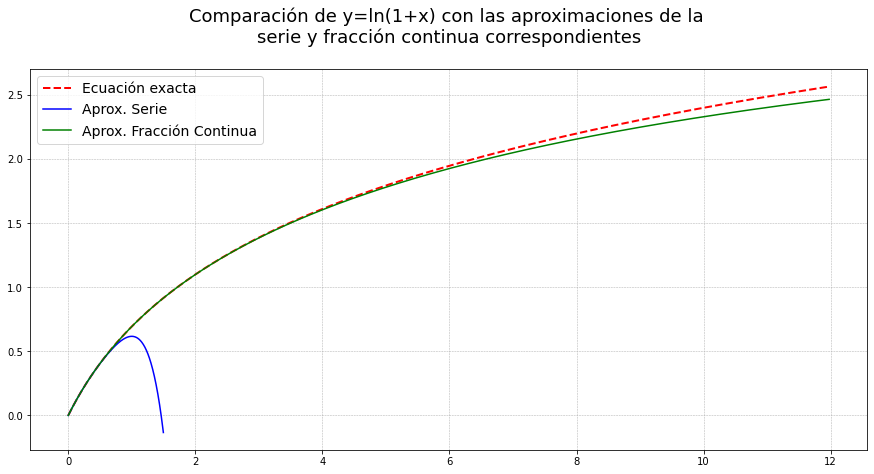

In [ ]:
f= lambda x: np.log(x+1)
fs= lambda x: x - x**2/2 + x**3/3 - x**4/4 + x**5/5 - x**6/6
fc= lambda x:  x/(1+x/2/(1+x/6/(1+x/3/(1+x/5/(1+x*3/10)))))

x = np.arange(0,12, 12/500)
x1=np.arange(0, 1.5, 1.5/500)
y= f(x)
y1=fs(x1)
y2=fc(x)

plt.figure(figsize=(15, 7))
plt.plot(x, y, 'r--',linewidth=2, label='Ecuación exacta')
plt.plot(x1, y1, 'b',label='Aprox. Serie')
plt.plot(x, y2, 'g',label='Aprox. Fracción Continua')

plt.grid( linestyle='--', linewidth=.5)
plt.legend(fontsize=14)
plt.title('Comparación de y=ln(1+x) con las aproximaciones de la \nserie y fracción continua correspondientes\n', fontsize=18)
plt.show()

## Algoritmo

In [ ]:
def seriesToFraction(funcion_simbolica, n):
    x = sym.Symbol('x')
    y0 = sym.series(funcion_simbolica, x,0,n)
    primer_coef=y0.coeff(x,0)
    y1=sym.series(y0-primer_coef, x,0,n)
    ys = [y1]
    coefs = []
    exps = []

    for i in range(sym.degree(y0)):
    
        j= 1
        coefs_i = 0
        exps_i = 0

        while True :
            c = ys[i].coeff(x,j)
            if c == 0 and j<sym.degree(ys[i])+1:
                j += 1

            else:
                if c==0:
                    break
                coefs_i = c
                exps_i = j
                coefs.append(coefs_i)
                exps.append(exps_i)
                break
#hasta aquí tenemos y_i, c_i, e_i
        if c==0:
            break
        ys.append(sym.series((coefs[i]*x**exps[i])/ys[i]-1,x,0,sym.degree(ys[i])-1))
    
    return [ys,coefs,exps,primer_coef]

In [ ]:
def FCF(coeff,exps,x,primer_coef):
    b=[coeff[i]*x**exps[i] for i in range(len(coeff))][::-1]
    
    expr=0
    for i in range(len(b)):
        expr = b[i]/(1+expr)
    expr=primer_coef+expr
    return expr

## Grafica asociada a la fracción continua

In [ ]:
def Fraction_Graph(funcion_simbolica, n,k,t):
    
    z=seriesToFraction(funcion_simbolica, n)
    
    fc= lambda x: FCF(z[1],z[2],x,z[3])
    
    x = np.arange(k,t, (t-k)/500)
    y1= fc(x)
    
    plt.plot(x, y1, 'g',label='Aprox. Fracción Continua')

**Ejemplo 13:**

En este ejemplo vamos a ilustrar el procedimiento para convertir la función $y=\cos{(x)}$ en fracción continua.

Text(0.5, 1.0, 'Comparación de y=sin(x) con las aproximaciones de la \nserie y fracción continua correspondientes\n')

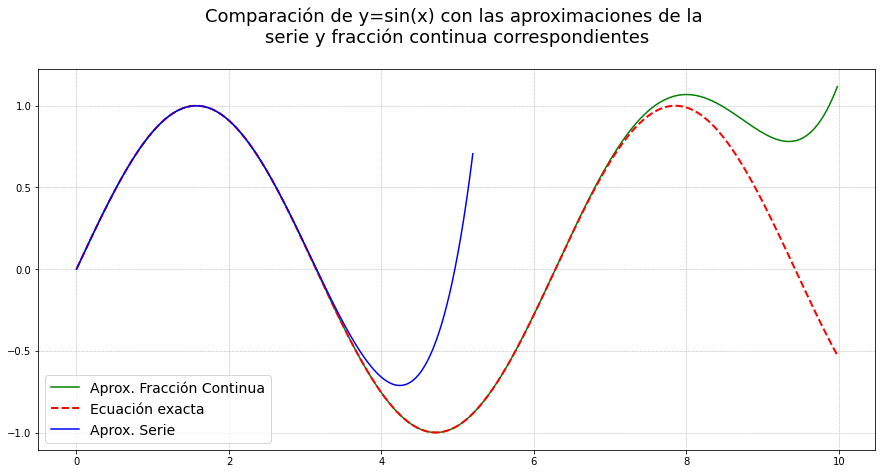

In [ ]:
x = sym.Symbol('x')
plt.figure(figsize=(15, 7))
Fraction_Graph(sym.sin(x),20,0,10)
f_exact= lambda x: np.sin(x)
z=sym.series(sym.sin(x),x,0,10)
fs=lambda y: sum([float(z.coeff(x,i))*y**i  for i in range(10)])


r = np.arange(0.001,10, 10/500)
y= f_exact(r)
x1=np.arange(0, 5.2, 1.7/500)
y1=fs(x1)

plt.plot(r, y, 'r--',linewidth=2, label='Ecuación exacta')
plt.plot(x1, y1, 'b',label='Aprox. Serie')

plt.grid( linestyle='--', linewidth=.5)
plt.legend(fontsize=14)
plt.title('Comparación de y=sin(x) con las aproximaciones de la \nserie y fracción continua correspondientes\n', fontsize=18)


## Aproximación de ecuaciones diferenciales

**Ejemplo 14:** Algoritmo rápido (Quicksort)

El análisis de la complejidad de algoritmos puede recurrir en muchos casos de un análisis combinatorio del problema. 

En este caso vamos a enfocarnos en la complejidad algoritmo Quicksort para ordenar una lista. Para esto se considera $b_n$ $(n\geq 0)$ el número promedio de comparaciones llevadas a cabo en este algoritmo.

En las referencias $[2]$ y $[3]$, se obtiene que $b_n$, sigue la recurrencia $b_0=0$ y para $n\geq 0$.

$$(n+1)b_{n+1}-(n+2)b_n=2n$$  
Se puede deducir que la función generatriz $B(x)$ de la sucesión $b_n$ satisface la ecuación diferencial

$$B'(x)=\frac{2x}{(1-x)^3}+\frac{2}{1-x}B(x)$$

Sin dificultad se puede determinar que la función generatriz satisface la siguiente igualdad

$$B(x)=-\frac{2x}{(1-x)^2}-\frac{2}{(1-x)^2}\log{\left(1-x\right)}$$

Vamos ahora a realizar la comparación de las aproximaciones de la función a partir de la serie y de su fracción continua respecto a la función exacta.

In [ ]:
x = sym.Symbol('x')
m=list(sym.Array([0]))

for n in range(13):
    m.append((m[n]*(n+2)+2*n)/(n+1))

s=sum([m[i]*x**i for i in range(13)])

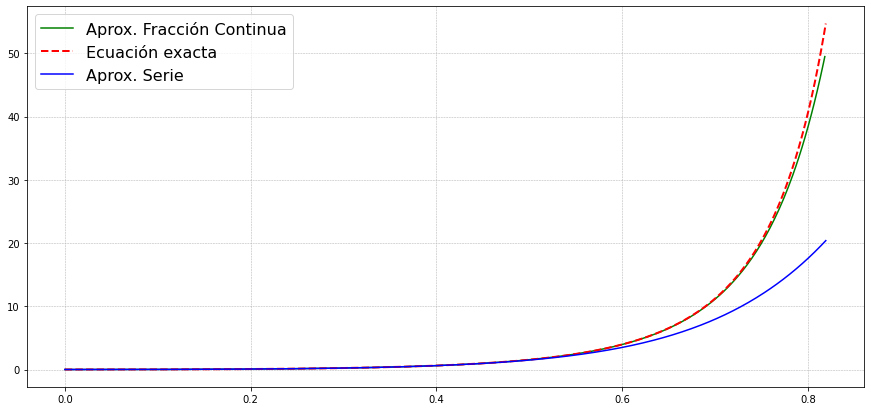

In [ ]:
x = sym.Symbol('x')
plt.figure(figsize=(15, 7))
Fraction_Graph(s,12,0,0.82)
f_exact= lambda x: -2*(np.log(1-x)+x)/(1-x)**2
z=sym.series(-2*(sym.log(1-x)+x)/(1-x)**2,x,0,12)
fs=lambda y: sum([float(z.coeff(x,i))*y**i  for i in range(10)])

r = np.arange(0,0.82, 0.85/500)
y= f_exact(r)
x1=np.arange(0, 0.82, 0.85/500)
y1=fs(x1)

plt.plot(r, y, 'r--',linewidth=2, label='Ecuación exacta')
plt.plot(x1, y1, 'b',label='Aprox. Serie')

plt.grid( linestyle='--', linewidth=.5)
plt.legend(fontsize=16)
#plt.title('Comparación de y=B(x) con las aproximaciones de la \nserie y fracción continua correspondientes\n', fontsize=18)

**Ejemplo 15:** 

Sistema de resorte no lineal sobreamortiguado. 

Un sistema vibratorio necesita dos elementos principales, inercia $ m $ que almacena energía cinética $ K = m \dot{x} ^ {2} / 2 $, y rigidez $ k $ que almacena energía potencial $ P = kx ^ {2} / 2. $ El sistema también puede tener un elemento amortiguador $ c $ que desperdicia energía $ \int c \dot{x} dx $, y excitación $ f (x, \dot{x}, t) $ que fuerzan al sistema seguir un mandato dado (Jazar 2013).

La amortiguación y la rigidez pueden no ser lineales y depender de $ x $, o $ \dot{x} $, o ser una variante temporal. La solución de estos casos es más interesante y complicada. Considere el sistema vibratorio no lineal


\begin{align*}
\ddot{x}+2 \dot{x}+0.2 x^{3}=0.02 \quad x(0)=1 \quad \dot{x}(0)=1
\end{align*}

que tiene $ m = 1, c = 2, k = 0.2 x ^ {2}, f (x, \dot{x}, t) = 0.02 $, y un equilibrio en $ x = \sqrt[3] {0.02 / 0.2} = 0.46416 $. Las posiciones de equilibrio son las soluciones de la ecuación algebraica resultante después de asumir que todas las derivadas son cero en la ecuación diferencial. La solución en serie de potencias de la ecuación. (4.877) es:

\begin{align*}
\begin{aligned}
x=& 1+t-\frac{109}{100} t^{2}+\frac{47}{75} t^{3}-\frac{1853}{6000} t^{4}+\frac{1201}{7500} t^{5}+\frac{167017}{2250000} t^{6} \\
&+\frac{672073}{31500000} t^{7}+\frac{45793}{14400000} t^{8}-\frac{22531823}{2268000000} t^{9}+\ldots
\end{aligned}
\end{align*}


La aproximación numérica se obtuvo con el programa Mathematica

In [ ]:
#Código de Mathematica

#r = NDSolve[{p''[x] + 2 p'[x] + 0.2 p[x]^3 == 0.02, p[0] == 1, p'[0] == 1}, p[x], {x, 0, 7}]
#z[x_] := Evaluate[p[x] /. r]

#u = Range[0, 3.4, 0.01];
#w = z[#][[1]] & /@ u;

#fu = {#, z[#][[1]]} & /@ u;
#ListLinePlot[fu]
#w

In [ ]:
r2=np.arange(0,3.4, 0.01)
u2=np.array([1., 1.00989, 1.01957, 1.02904, 1.0383, 1.04735, 1.05621, 1.06487, 1.07333, 1.08161, 1.0897, 1.0976, 1.10533, 1.11287, 1.12025, 1.12744,1.13448, 1.14134, 1.14804, 1.15458, 1.16097, 1.16719, 1.17327, 1.17919, 1.18497, 1.1906, 1.19609, 1.20144, 1.20665, 1.21172, 
1.21666, 1.22147, 1.22615, 1.2307, 1.23512, 1.23943, 1.24361, 1.24767, 1.25162, 1.25545, 1.25917, 1.26278, 1.26628, 1.26967, 1.27295, 1.27613, 1.27921, 1.28219, 1.28507, 1.28785, 1.29054,1.29314, 1.29564, 1.29805, 1.30037, 1.3026, 1.30475, 1.30682, 1.3088, 
1.31069, 1.31251, 1.31425, 1.31592, 1.3175, 1.31901, 1.32045, 1.32182, 1.32311, 1.32434, 1.3255, 1.32659, 1.32761, 1.32857, 1.32947, 1.3303, 1.33108, 1.33179, 1.33244, 1.33304, 1.33358,1.33406, 1.33449, 1.33487, 1.33519, 1.33546, 1.33568, 1.33586, 
1.33598, 1.33605, 1.33608, 1.33607, 1.336, 1.3359, 1.33575, 1.33556, 1.33532, 1.33505, 1.33474, 1.33438, 1.33399, 1.33357, 1.3331, 1.3326, 1.33207, 1.3315, 1.3309, 1.33026, 1.32959, 1.32889, 1.32816, 1.32741, 1.32662, 1.3258, 1.32495, 1.32408, 1.32318, 1.32226, 1.32131, 
1.32033, 1.31933, 1.31831, 1.31726, 1.31619, 1.3151, 1.31399, 1.31285, 1.3117, 1.31052, 1.30933, 1.30812, 1.30689, 1.30564, 1.30437, 1.30309, 1.30179, 1.30048, 1.29915, 1.2978, 1.29644, 1.29507, 1.29368, 1.29228, 1.29086, 1.28944, 1.288, 1.28654, 1.28508, 
1.28361, 1.28212, 1.28063, 1.27912, 1.27761, 1.27608, 1.27455, 1.27301, 1.27146, 1.2699, 1.26834, 1.26676, 1.26518, 1.2636, 1.262, 1.2604, 1.2588, 1.25719, 1.25557, 1.25395, 1.25232, 1.25069, 1.24905, 1.24741, 1.24577, 1.24412, 1.24247, 1.24081, 1.23915, 1.23749, 
1.23583, 1.23416, 1.23249, 1.23082, 1.22915, 1.22748, 1.2258, 1.22413, 1.22245, 1.22077, 1.21909, 1.21741, 1.21573, 1.21405, 1.21237, 1.21068, 1.209, 1.20732, 1.20564, 1.20396, 1.20228, 1.2006, 1.19893, 1.19725, 1.19558, 1.1939, 1.19223, 1.19056, 1.18889, 
1.18722, 1.18556, 1.18389, 1.18223, 1.18057, 1.17891, 1.17726, 1.17561, 1.17396, 1.17231, 1.17067, 1.16902, 1.16738, 1.16575, 1.16412, 1.16249, 1.16086, 1.15924, 1.15762, 1.156, 1.15439, 1.15278, 1.15117, 1.14957, 1.14797, 1.14637, 1.14478, 1.14319, 1.14161, 
1.14003, 1.13845, 1.13688, 1.13531, 1.13375, 1.13218, 1.13063, 1.12908, 1.12753, 1.12599, 1.12445, 1.12291, 1.12138, 1.11985, 1.11833, 1.11682, 1.1153, 1.11379, 1.11229, 1.11079, 1.1093, 1.10781, 1.10632, 1.10484, 1.10336, 1.10189, 1.10042, 1.09896, 1.0975, 
1.09605, 1.0946, 1.09316, 1.09172, 1.09028, 1.08885, 1.08743, 1.08601, 1.08459, 1.08318, 1.08177, 1.08037, 1.07898, 1.07758, 1.0762, 1.07482, 1.07344, 1.07206, 1.0707, 1.06933, 1.06797, 1.06662, 1.06527, 1.06393, 1.06259, 1.06125, 1.05992, 1.0586, 1.05728, 
1.05596, 1.05465, 1.05334, 1.05204, 1.05075, 1.04945, 1.04817, 1.04688, 1.04561, 1.04433, 1.04306, 1.0418, 1.04054, 1.03928, 1.03803, 1.03679, 1.03555, 1.03431, 1.03308, 1.03185, 1.03063, 1.02941, 1.02819, 1.02698, 1.02578, 1.02458, 1.02338, 1.02219, 1.021, 
1.01982, 1.01864, 1.01747, 1.0163, 1.01513, 1.01397, 1.01282, 1.01166, 1.01052, 1.00937, 1.00823, 1.0071, 1.00597, 1.00484, 1.00372, 1.0026, 1.00148, 1.00037])

In [ ]:
x = sym.Symbol('x')
m=list(sym.Array([0]))

p=sym.Array([1,1,-109,47,-1853,1201,167017,672073,45793,-22531823])
q=sym.Array([1,1,100,75,6000,7500,2250000,31500000,14400000,2268000000])

s=sym.series(sum([p[i]/q[i]*x**i for i in range(10)]),x,0,10)


Text(0.5, 1.0, 'Comparación de la ecuación diferencial con las aproximaciones de la \nserie y fracción continua correspondientes\n')

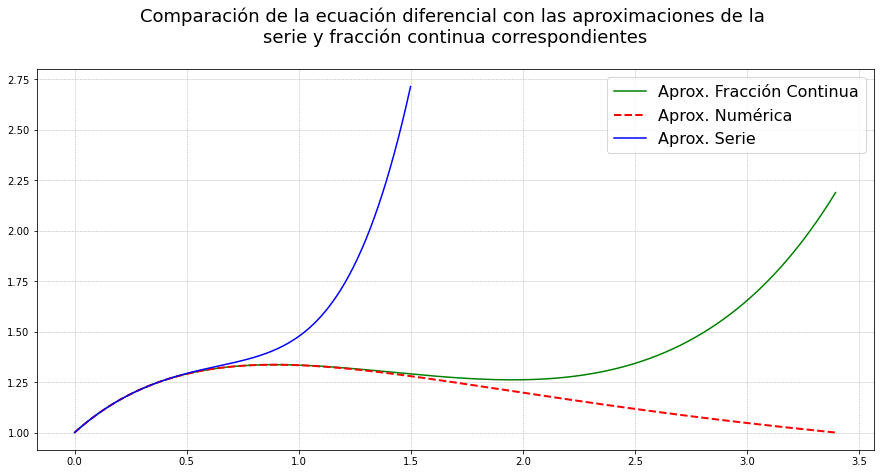

In [ ]:
x = sym.Symbol('x')
plt.figure(figsize=(15, 7))
Fraction_Graph(s,10,0,3.4)

fs=lambda y: sum([float(s.coeff(x,i))*y**i  for i in range(10)])


x1=np.arange(0, 1.5, 1/500)
y1=fs(x1)

plt.plot(r2,u2,'r--',linewidth=2, label='Aprox. Numérica')
plt.plot(x1, y1, 'b',label='Aprox. Serie')

plt.grid( linestyle='--', linewidth=.5)
plt.legend(fontsize=16)
plt.title('Comparación de la ecuación diferencial con las aproximaciones de la \nserie y fracción continua correspondientes\n', fontsize=18)


# Referencias

1. Reza N. Jazar,Approximation methods in science and engineering, SpringerVerlag, Berlin Heidelberg, 2020.

2.  Donald E. Knuth, The Art of Computer Programming, Volume 3: Sorting and Searching, Addison-Wesley, 1973.

3. arXiv:1503.02504